In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [2]:
path = "tetris_blocks.png"
#path = "spheres.png"

Load the input image (whose path was supplied via command line argument) and display the image to our screen

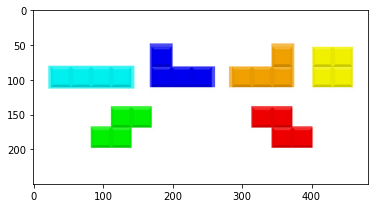

In [3]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale

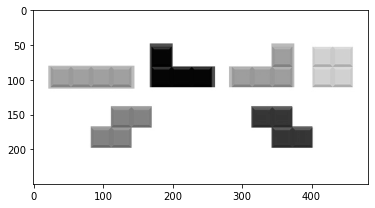

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap= "gray")

Applying edge detection we can find the outlines of objects in images


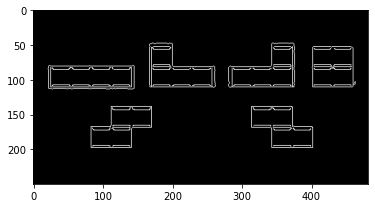

In [5]:
edged = cv2.Canny(image, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values less than 225 to 255(white; foreground) and all pixel values >= 225 to 255 (black; background), thereby segmenting the image.

This can be tweeked so say all pixel values less than 128.

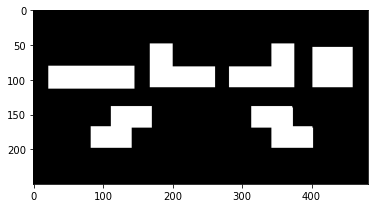

In [6]:
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image

In [7]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours

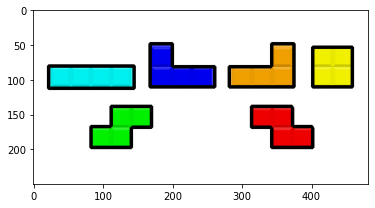

In [8]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple

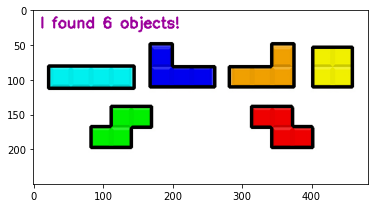

In [9]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects

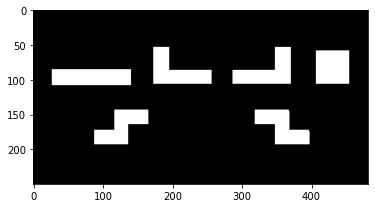

In [10]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects

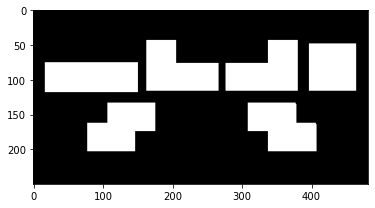

In [11]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise AND to our input image, keeping only the masked regions

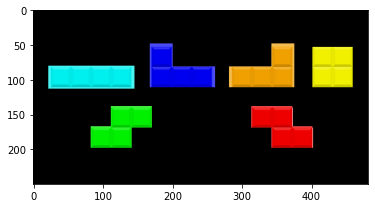

In [12]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Ex 1
    A) Can you remove the yellow square from the image?
    B) Go through the tutorial but with the "spheres.png" image. (replace tetris_blocks with spheres.png)
    C) Tweak the parameters of the thresholding can you threshold all the spheres?
    D) Can you remove the red sphere?
    C) Can you remove the green?

# EX 1 A)
Removing yellow square

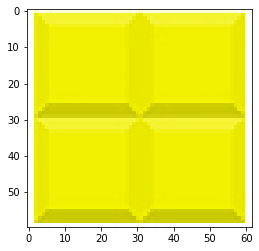

In [13]:
roi_y = range(52,113)
roi_x = range(400,462)
roi_yellow = image[52:112, 400:462]
plt.imshow(roi_yellow)

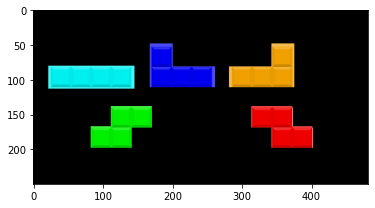

In [14]:

mask_without = mask
for x in roi_x:
    for y in roi_y:
        mask_without[y,x]=0
mask_without = mask
plt.imshow(mask)

#mask_noyellow = cv2.bitwise_not(roi_yellow)
im_noyellow = cv2.bitwise_and(image, image, mask=mask_without)
plt.imshow(im_noyellow)

In [15]:
#threshold_lower = cv2.cv.Scalar(225,225,0)
#threshold_upper = cv2.cv.Scalar(255,255,0)
#threshold = 225
#threshold_value = 255

#thresh = cv2.inRange(image, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
#plt.imshow(thresh, cmap = 'gray')

(250, 482, 3)

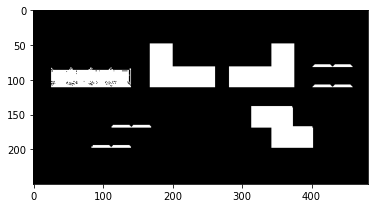

In [28]:
(b, g, r) = cv2.split(image)
ret2, thresh2 = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY_INV)
ret3, thresh3 = cv2.threshold(g, 225, 255, cv2.THRESH_BINARY_INV)
ret4, thresh4 = cv2.threshold(r, 225, 255, cv2.THRESH_BINARY_INV)
bgr_thresh = cv2.merge((thresh2, thresh3, thresh4))
mask_or = np.bitwise_or(thresh2, thresh3, thresh4)

plt.imshow(mask_or, cmap='gray')
bgr_thresh.shape

NameError: name 'mask_colors' is not defined

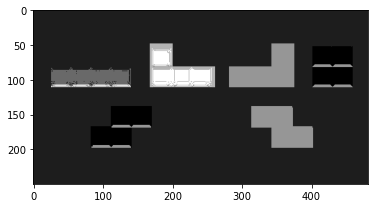

In [ ]:
im_noyellow = cv2.bitwise_and(image, image, mask=mask_colors)
plt.imshow(im_noyellow)

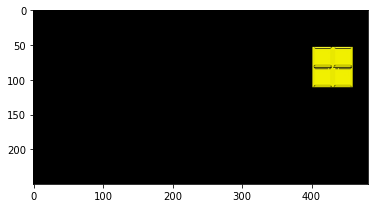

In [29]:
range_min = np.array([199, 199, 0])
range_max = np.array([255, 255, 50])
mask = cv2.inRange(image, range_min, range_max)
new_output = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(new_output)